In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '20250107_NH3_N2/'
file = os.listdir(path)

dfs = []
for f in file[5:81]:
    dfs.append(pd.read_csv(path+f, index_col='Time'))    
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(9348, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
0,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
1,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
2,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
3,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
4,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [3]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

# Given the spectrometer measures 200 - 1100 nn, drop columns outside this range
# df = df[df.columns[296:]]
new_col = [str(DropFromSecond(x)) for x in df.columns.astype(float)]
df.columns = new_col
df.index = [0.6*i for i in range(len(df.index))]
df.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-38.0,-13.0,5.0,13.0,-1.0,39.0,8.0,3.0,-8.0,-21.0,...,-12.0,2.0,-24.0,1.0,-9.0,50.0,-2.0,-22.0,-16.0,-11.0
0.6,-37.0,-28.0,23.0,2.0,16.0,34.0,13.0,-1.0,-20.0,-15.0,...,-20.0,-2.0,-23.0,9.0,5.0,38.0,-13.0,-23.0,-23.0,15.0
1.2,-34.0,-25.0,21.0,13.0,5.0,38.0,-8.0,-2.0,-6.0,-17.0,...,-21.0,-7.0,-12.0,9.0,0.0,44.0,-6.0,-20.0,-20.0,-8.0
1.8,-37.0,-5.0,24.0,12.0,27.0,40.0,9.0,-3.0,-7.0,-21.0,...,-14.0,-2.0,-11.0,4.0,4.0,51.0,-7.0,-33.0,-22.0,7.0
2.4,-40.0,-23.0,14.0,5.0,32.0,40.0,10.0,-1.0,5.0,-20.0,...,-22.0,-5.0,-12.0,18.0,7.0,63.0,-5.0,-28.0,-22.0,7.0


In [4]:
# extact 20, 40 and 60 cycles
c20 = df[(df.index >= 1680) & (df.index <=1770)]
c40 = df[(df.index >= 3430) & (df.index <=3520)] # 90s
c60 = df[(df.index >= 5150) & (df.index <=5240)]
c20.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1680.0,-42.0,-36.0,19.0,-3.0,14.0,50.0,6.0,5.0,-16.0,-31.0,...,-17.0,16.0,-17.0,10.0,-2.0,58.0,-18.0,-30.0,-15.0,-19.0
1680.6,-34.0,-24.0,10.0,-6.0,9.0,40.0,-12.0,-13.0,3.0,-28.0,...,-8.0,-11.0,-3.0,-7.0,6.0,52.0,-15.0,-19.0,-26.0,13.0
1681.2,-36.0,-29.0,13.0,10.0,19.0,41.0,0.0,-9.0,2.0,-23.0,...,-16.0,-9.0,-9.0,-10.0,6.0,62.0,-12.0,-28.0,-29.0,7.0
1681.8,-49.0,-30.0,8.0,5.0,7.0,38.0,1.0,10.0,14.0,-29.0,...,-9.0,3.0,-9.0,-1.0,4.0,51.0,0.0,-20.0,-22.0,-3.0
1682.4,-33.0,-30.0,12.0,-6.0,19.0,45.0,3.0,9.0,-4.0,-33.0,...,-9.0,-7.0,-18.0,6.0,-7.0,43.0,-11.0,-38.0,-21.0,6.0


In [5]:
c40.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
3430.2,-35.0,-15.0,9.0,9.0,20.0,39.0,-8.0,7.0,1.0,-33.0,...,-10.0,2.0,-11.0,4.0,4.0,64.0,-10.0,-27.0,-22.0,-11.0
3430.8,-46.0,-28.0,6.0,16.0,2.0,33.0,10.0,-8.0,-11.0,-36.0,...,-39.0,-19.0,-30.0,6.0,11.0,60.0,-15.0,-41.0,-22.0,-22.0
3431.4,-41.0,-20.0,12.0,-1.0,19.0,40.0,4.0,-4.0,-2.0,-36.0,...,-6.0,5.0,-22.0,-19.0,0.0,39.0,-5.0,-24.0,-31.0,-11.0
3432.0,-36.0,-17.0,20.0,-8.0,-4.0,29.0,-1.0,19.0,-12.0,-16.0,...,-31.0,-20.0,-23.0,-3.0,9.0,40.0,4.0,-24.0,-40.0,-20.0
3432.6,-50.0,-37.0,11.0,4.0,13.0,21.0,6.0,0.0,-12.0,-24.0,...,-36.0,-1.0,-16.0,-5.0,-9.0,36.0,-9.0,-27.0,-29.0,-6.0


In [6]:
c60.head()

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
5150.4,-26.0,-39.0,6.0,3.0,14.0,31.0,-1.0,-7.0,-3.0,-30.0,...,-16.0,-2.0,-20.0,4.0,-8.0,49.0,-4.0,-20.0,-18.0,-8.0
5151.0,-36.0,-26.0,16.0,-4.0,16.0,41.0,-8.0,-11.0,5.0,-22.0,...,-16.0,-1.0,-14.0,7.0,-12.0,43.0,-16.0,-32.0,-16.0,-12.0
5151.6,-30.0,-22.0,10.0,10.0,22.0,27.0,-3.0,-15.0,-1.0,-23.0,...,-21.0,-6.0,-2.0,4.0,6.0,70.0,0.0,-23.0,-18.0,4.0
5152.2,-37.0,-17.0,14.0,12.0,7.0,30.0,-6.0,-8.0,10.0,-30.0,...,-20.0,15.0,-16.0,-6.0,3.0,43.0,6.0,-28.0,-26.0,-19.0
5152.8,-45.0,-30.0,10.0,10.0,15.0,34.0,-14.0,7.0,8.0,-27.0,...,-11.0,2.0,-15.0,-3.0,1.0,36.0,-4.0,-31.0,-26.0,-5.0


In [7]:
c20_log = c20.copy()
c40_log = c40.copy()
c60_log = c60.copy()

x_20 = [0.6*i for i in range(len(c20.index))]
y_20 = c20.columns.tolist()
x_40 = [0.6*i for i in range(len(c40.index))]
y_40 = c40.columns.tolist()
x_60 = [0.6*i for i in range(len(c60.index))]
y_60 = c60.columns.tolist()

# absolute
for i in range(len(c20.index)):
    for j in range(len(c20.columns)):
        if c20.iloc[i,j]<0:
            c20.iloc[i,j]=0
# log
for i in range(len(c20_log.index)):
    for j in range(len(c20.columns)):
        if c20_log.iloc[i,j]<=1:
            c20_log.iloc[i,j]=0
        else:
            c20_log.iloc[i,j] = np.log10(c20_log.iloc[i,j])

# absolute
for i in range(len(c40.index)):
    for j in range(len(c40.columns)):
        if c40.iloc[i,j]<0:
            c40.iloc[i,j]=0
# log
for i in range(len(c40_log.index)):
    for j in range(len(c40.columns)):
        if c40_log.iloc[i,j]<=1:
            c40_log.iloc[i,j]=0
        else:
            c40_log.iloc[i,j] = np.log10(c40_log.iloc[i,j])

# absolute
for i in range(len(c60.index)):
    for j in range(len(c60.columns)):
        if c60.iloc[i,j]<0:
            c60.iloc[i,j]=0
# log
for i in range(len(c60_log.index)):
    for j in range(len(c60.columns)):
        if c60_log.iloc[i,j]<=1:
            c60_log.iloc[i,j]=0
        else:
            c60_log.iloc[i,j] = np.log10(c60_log.iloc[i,j])

C:\Users\syj43\AppData\Local\Temp\ipykernel_22344\4279822779.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c20.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_22344\4279822779.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c40.iloc[i,j]=0
C:\Users\syj43\AppData\Local\Temp\ipykernel_22344\4279822779.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c60.iloc[i,j]=0


In [8]:
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(c20_log.columns).reshape(-1, 1))
y_20 = mm.transform(np.array(c20_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c40_log.columns).reshape(-1, 1))
y_40 = mm.transform(np.array(c40_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

mm = MinMaxScaler()
mm.fit(np.array(c60_log.columns).reshape(-1, 1))
y_60 = mm.transform(np.array(c60_log.columns).reshape(-1, 1)).flatten() * 1142 + 50

In [9]:
X_20, Y_20 = np.meshgrid(x_20, y_20)
Z_20 = c20_log.T

X_40, Y_40 = np.meshgrid(x_40, y_40)
Z_40 = c40_log.T

X_60, Y_60 = np.meshgrid(x_60, y_60)
Z_60 = c60_log.T

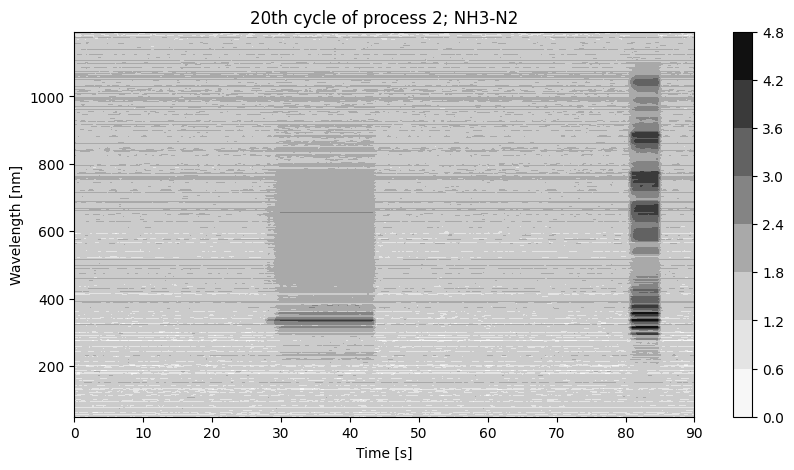

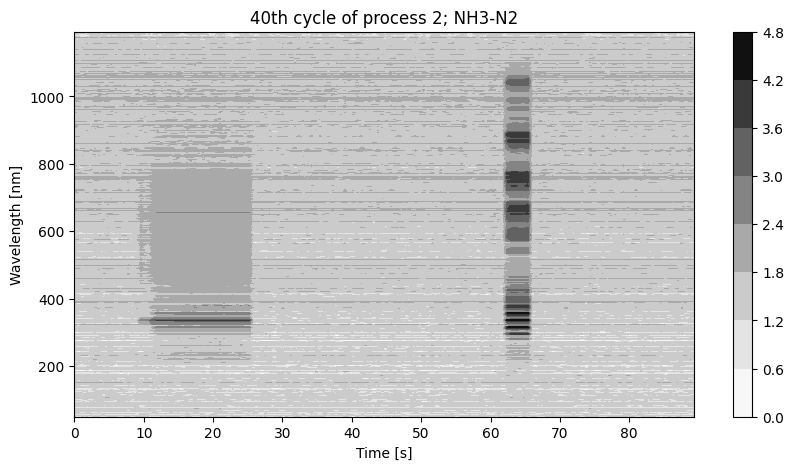

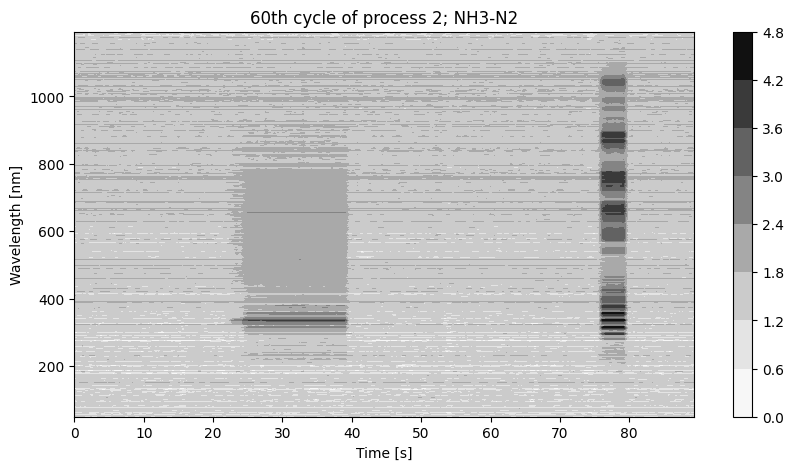

In [10]:
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 2; NH3-N2')
plt.colorbar()
plt.show()

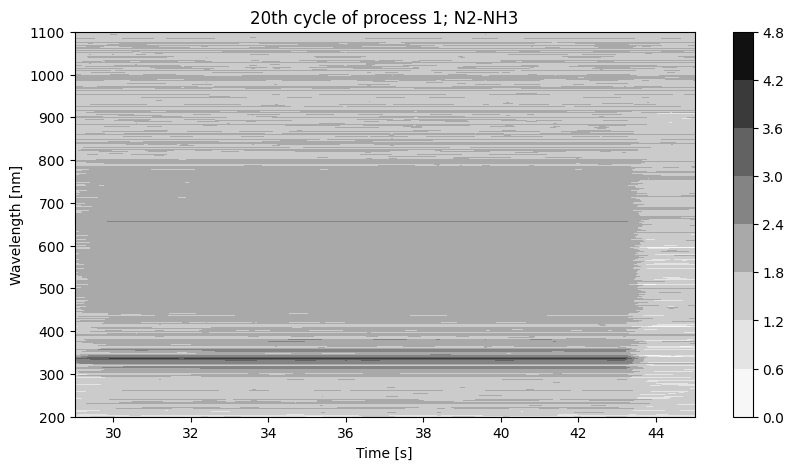

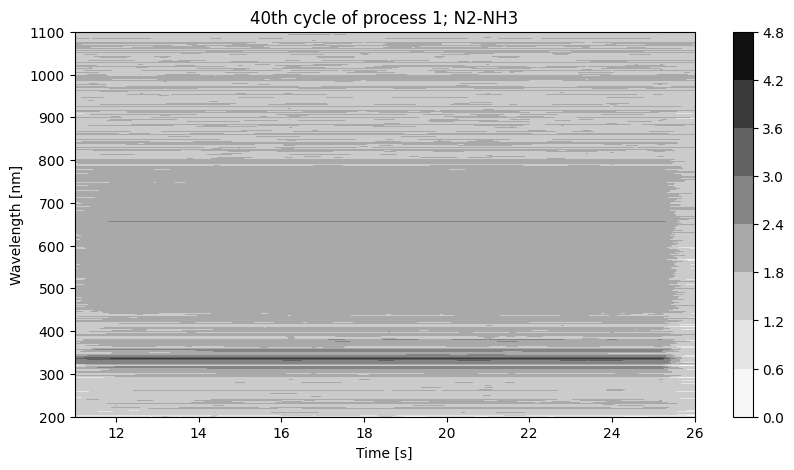

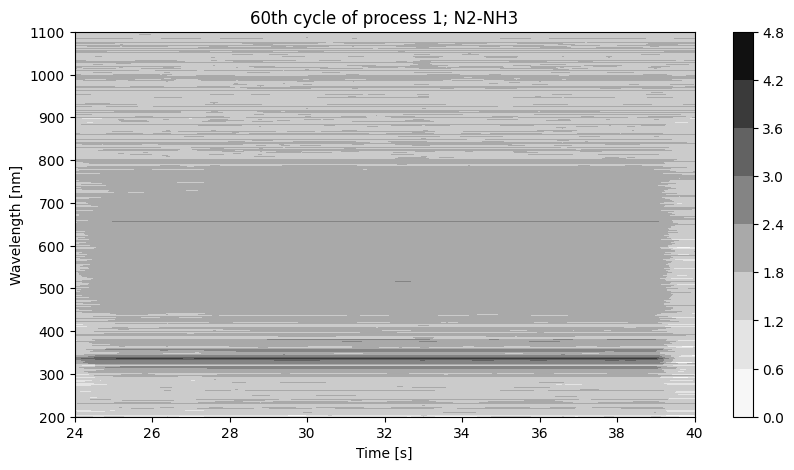

In [11]:
#NH3

plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(29,45) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(11,26) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(24,40) # 15s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2-NH3')
plt.colorbar()
plt.show()

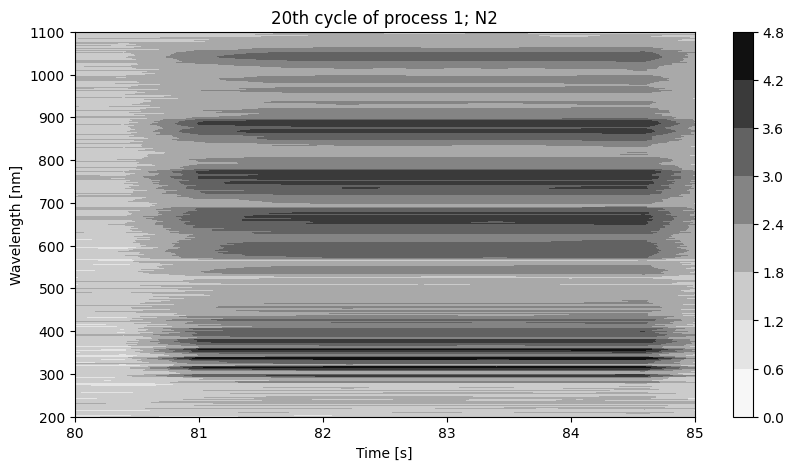

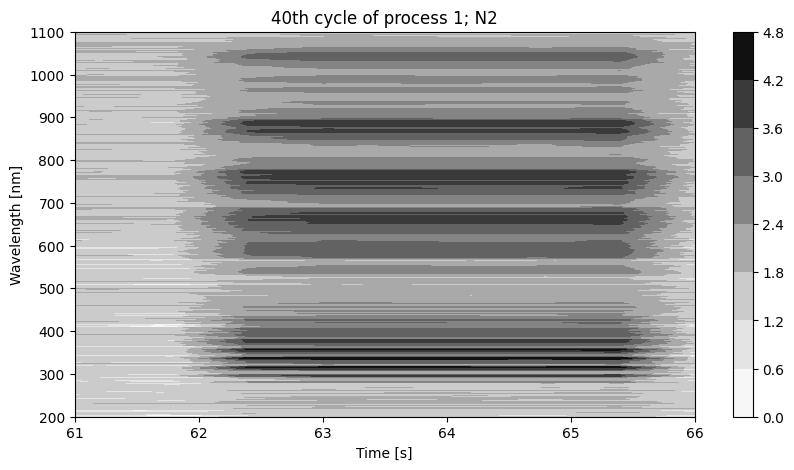

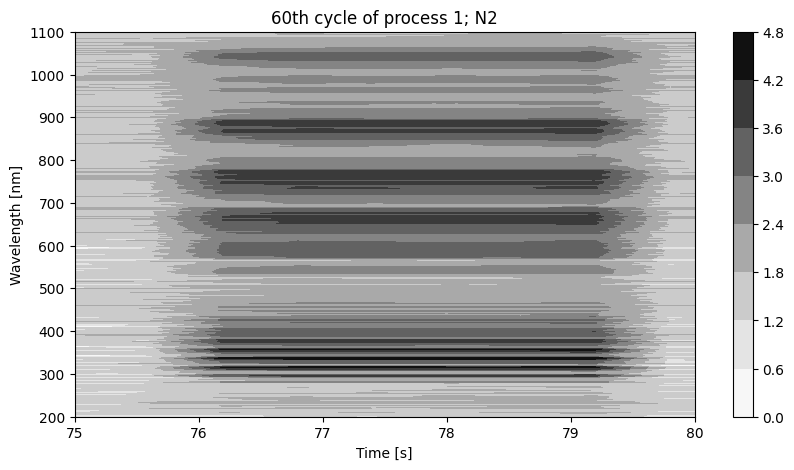

In [12]:
#N2
plt.figure(figsize=(10,5))
plt.contourf(X_20, Y_20, Z_20, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(80,85) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('20th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_40, Y_40, Z_40, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(61,66) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('40th cycle of process 1; N2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,5))
plt.contourf(X_60, Y_60, Z_60, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(75,80) # 5s
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('60th cycle of process 1; N2')
plt.colorbar()
plt.show()

In [13]:
c20_start = 1680
c20_N2 = c20[(c20.index>=c20_start+81)&(c20.index<=c20_start+84)]
c20_NH3 = c20[(c20.index>=c20_start+30)&(c20.index<=c20_start+43)]

c40_start = 3430.2
c40_N2 = c40[(c40.index>=c40_start+62)&(c40.index<=c40_start+65)]
c40_NH3 = c40[(c40.index>=c40_start+12)&(c40.index<=c40_start+25)]

c60_start = 5150.4
c60_N2 = c60[(c60.index>=c60_start+76)&(c60.index<=c60_start+79)]
c60_NH3 = c60[(c60.index>=c60_start+25)&(c60.index<=c60_start+39)]

In [14]:
c20_N2

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
1761.0,0.0,0.0,16.0,3.0,24.0,23.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,44.0,1.0,0.0,0.0,0.0
1761.6,0.0,0.0,23.0,1.0,18.0,38.0,0.0,13.0,0.0,0.0,...,0.0,9.0,0.0,0.0,10.0,56.0,0.0,0.0,0.0,1.0
1762.2,0.0,0.0,7.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,2.0,2.0,48.0,0.0,0.0,0.0,0.0
1762.8,0.0,0.0,15.0,7.0,16.0,30.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,3.0,39.0,0.0,0.0,0.0,8.0
1763.4,0.0,0.0,24.0,0.0,20.0,43.0,0.0,0.0,8.0,0.0,...,0.0,2.0,0.0,4.0,3.0,47.0,0.0,0.0,0.0,6.0
1764.0,0.0,0.0,12.0,9.0,23.0,32.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,53.0,4.0,0.0,0.0,0.0


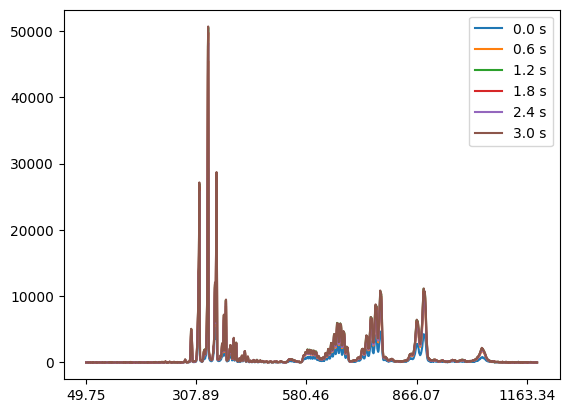

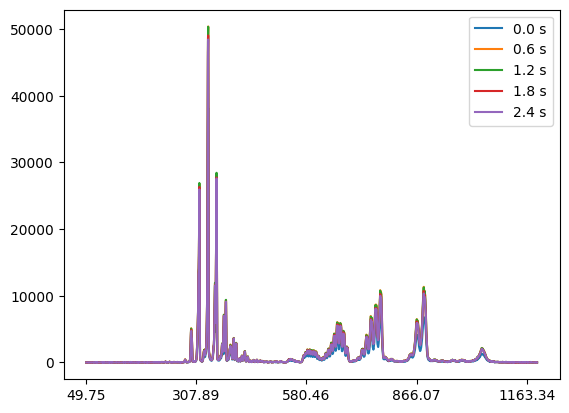

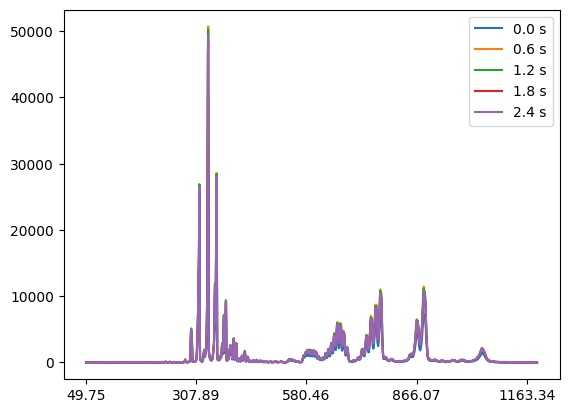

In [15]:
c20_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_N2))]
c20_N2.T.plot(kind='line')
plt.show()

c40_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_N2))]
c40_N2.T.plot(kind='line')
plt.show()

c60_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_N2))]
c60_N2.T.plot(kind='line')
plt.show()

In [16]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_N2['336.67'].idxmax(), c40_N2['336.67'].idxmax(), c60_N2['336.67'].idxmax())

3.0 s 0.6 s 0.6 s


In [17]:
c20_log_N2 = c20_log[(c20_log.index>=c20_start+81)&(c20_log.index<=c20_start+84)]
c20_log_NH3 = c20_log[(c20_log.index>=c20_start+30)&(c20_log.index<=c20_start+43)]

c40_log_N2 = c40_log[(c40_log.index>=c40_start+62)&(c40_log.index<=c40_start+65)]
c40_log_NH3 = c40_log[(c40_log.index>=c40_start+12)&(c40_log.index<=c40_start+25)]

c60_log_N2 = c60_log[(c60_log.index>=c60_start+76)&(c60_log.index<=c60_start+79)]
c60_log_NH3 = c60_log[(c60_log.index>=c60_start+25)&(c60_log.index<=c60_start+39)]

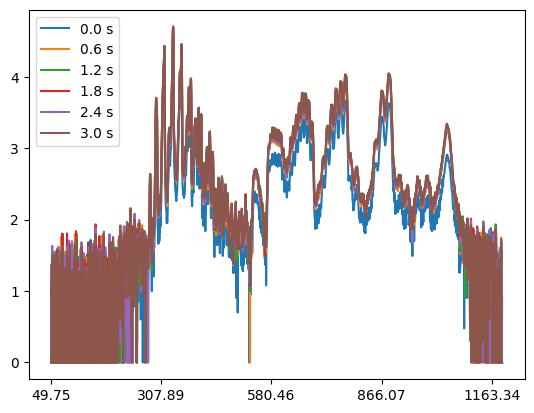

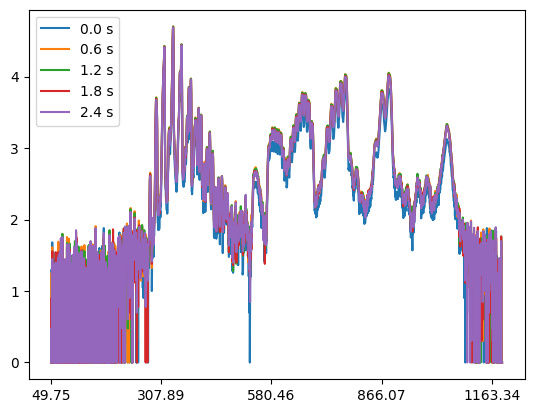

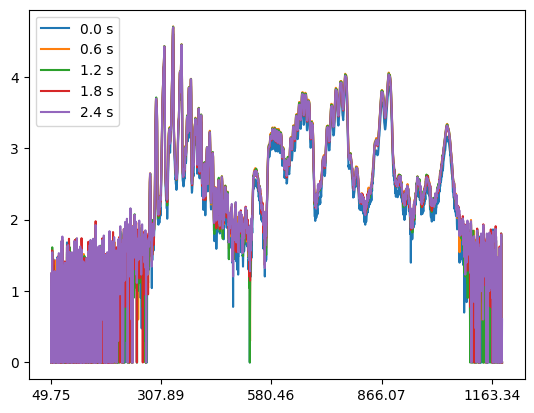

In [18]:
c20_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_N2))]
c20_log_N2.T.plot(kind='line')
plt.show()

c40_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_N2))]
c40_log_N2.T.plot(kind='line')
plt.show()

c60_log_N2.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_N2))]
c60_log_N2.T.plot(kind='line')
plt.show()

In [19]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_log_N2['336.67'].idxmax(), c40_log_N2['336.67'].idxmax(), c60_log_N2['336.67'].idxmax())

3.0 s 0.6 s 0.6 s


In [20]:
# get the plot at 1.2s
c_N2_absolute = pd.concat([c20_N2[c20_N2.index=='3.0 s'], c40_N2[c40_N2.index=='0.6 s'], c60_N2[c60_N2.index=='0.6 s']])
c_N2_absolute.index = [20,40,60] # refers to cycles
c_N2_log = pd.concat([c20_log_N2[c20_log_N2.index=='3.0 s'], c40_log_N2[c40_log_N2.index=='0.6 s'], c60_log_N2[c60_log_N2.index=='0.6 s']])
c_N2_log.index = [20,40,60] # refers to cycles

In [21]:
c_N2_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,12.0,9.0,23.0,32.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,53.0,4.0,0.0,0.0,0.0
40,0.0,0.0,18.0,1.0,4.0,41.0,0.0,2.0,0.0,0.0,...,0.0,13.0,0.0,21.0,5.0,50.0,7.0,0.0,0.0,0.0
60,0.0,0.0,9.0,6.0,9.0,33.0,8.0,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0


In [22]:
c_N2_absolute.to_csv('file/process2/cycles_c_N2_absolute.csv')
c_N2_log.to_csv('file/process2/cycles_c_N2_log.csv')

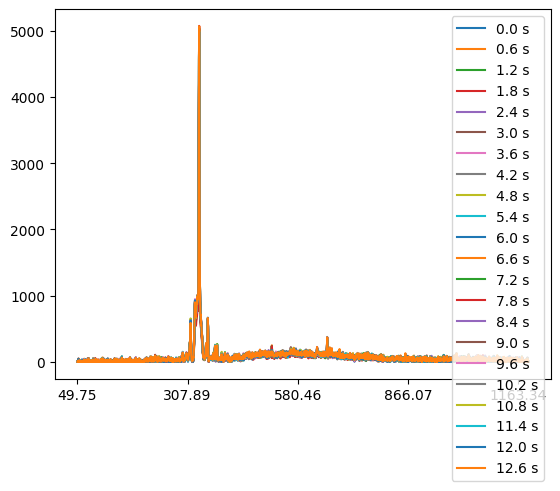

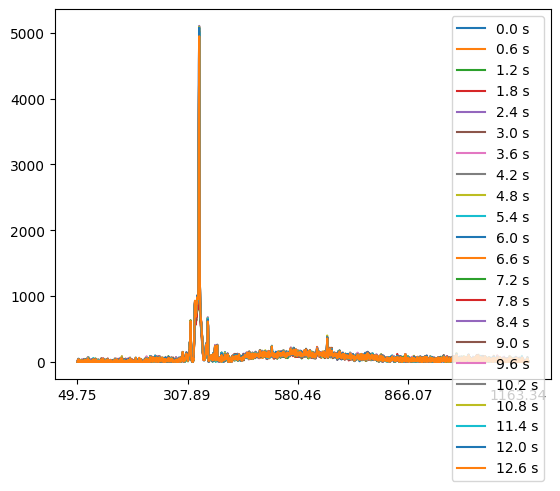

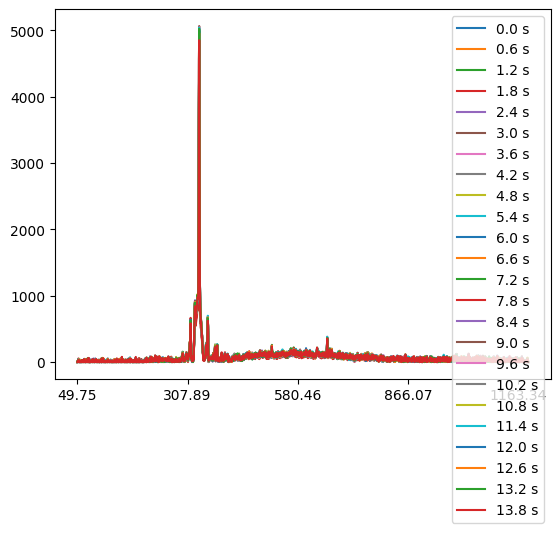

In [23]:
c20_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_NH3))]
c20_NH3.T.plot(kind='line')
plt.show()

c40_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_NH3))]
c40_NH3.T.plot(kind='line')
plt.show()

c60_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_NH3))]
c60_NH3.T.plot(kind='line')
plt.show()

In [24]:
# extact mamximum values given that the highest intensity peak appears at 336.67 nm
print(c20_NH3['336.13'].idxmax(), c40_NH3['336.13'].idxmax(), c60_NH3['336.13'].idxmax())

7.8 s 8.4 s 9.0 s


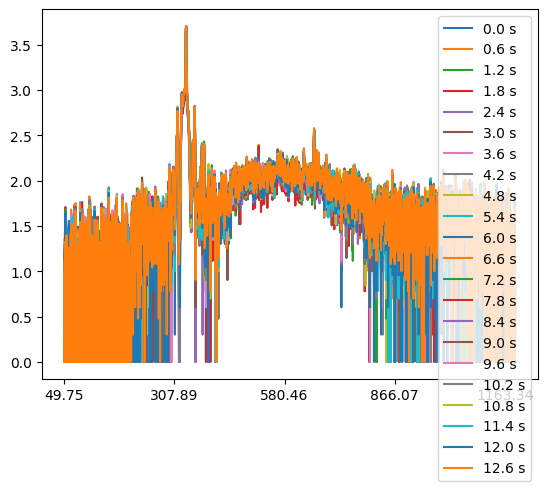

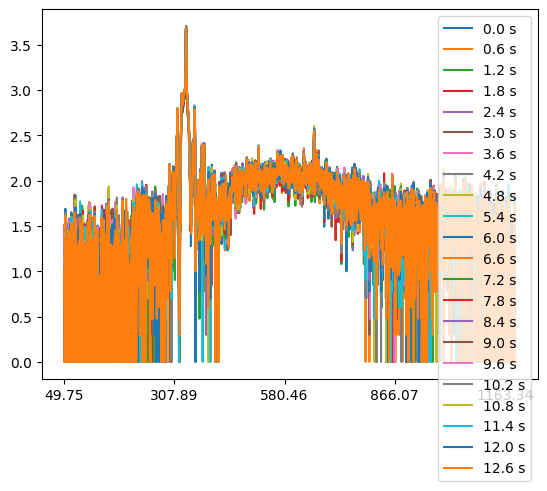

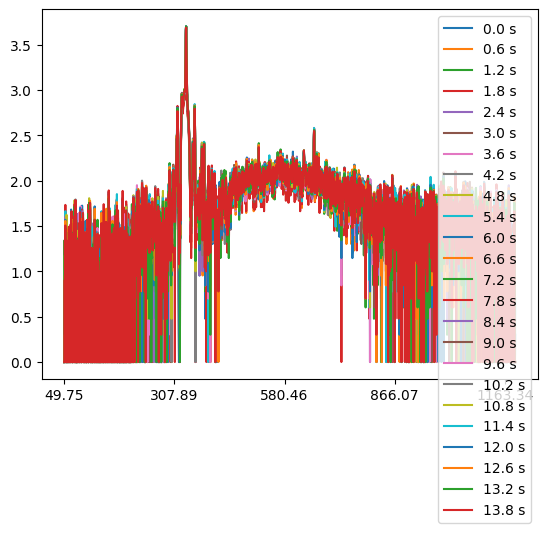

In [25]:
c20_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c20_log_NH3))]
c20_log_NH3.T.plot(kind='line')
plt.show()

c40_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c40_log_NH3))]
c40_log_NH3.T.plot(kind='line')
plt.show()

c60_log_NH3.index = [str(np.round(0.6*i,2))+' s' for i in range(len(c60_log_NH3))]
c60_log_NH3.T.plot(kind='line')
plt.show()

In [26]:
# save NH3 at 6.6s
c_NH3_absolute = pd.concat([c20_NH3[c20_NH3.index=='7.8 s'], c40_NH3[c40_NH3.index=='8.4 s'], c60_NH3[c60_NH3.index=='9.0 s']])
c_NH3_log = pd.concat([c20_log_NH3[c20_log_NH3.index=='7.8 s'], c40_log_NH3[c40_log_NH3.index=='8.4 s'], c60_log_NH3[c60_log_NH3.index=='9.0 s']])

c_NH3_absolute.index = [20,40,60] # refers the 20th cycle
c_NH3_log.index = [20,40,60]
c_NH3_absolute

,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
20,0.0,0.0,3.0,10.0,16.0,34.0,7.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,62.0,12.0,0.0,0.0,4.0
40,0.0,0.0,3.0,3.0,15.0,35.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
60,0.0,0.0,7.0,3.0,16.0,23.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19.0,0.0,62.0,0.0,0.0,0.0,0.0


In [27]:
c_NH3_absolute.to_csv('file/process2/cycles_c_NH3_absolute.csv')
c_NH3_log.to_csv('file/process2/cycles_c_NH3_log.csv')

In [28]:
# random color generator
import random
random.seed(52)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(6)]

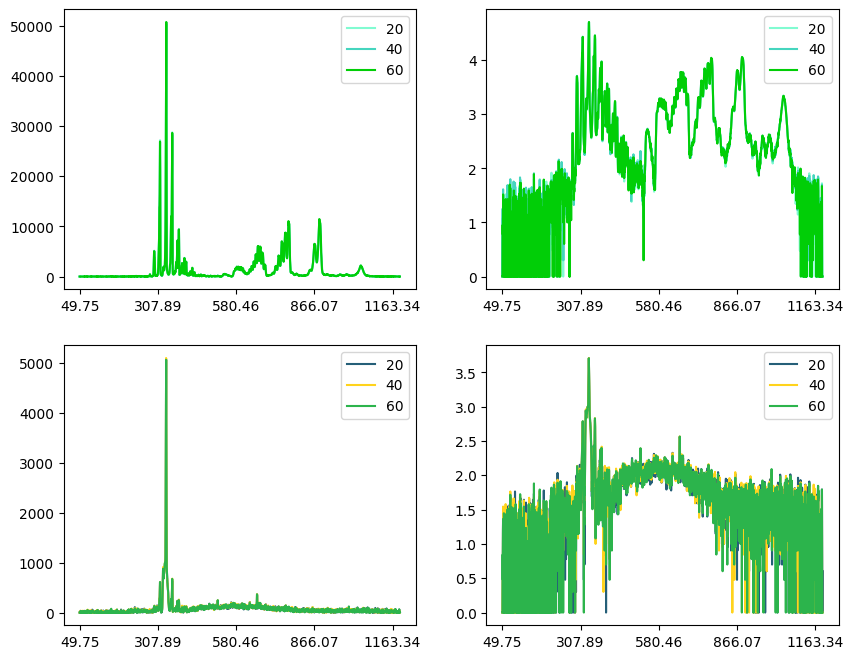

In [29]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
c_N2_absolute.T.plot(kind='line', ax=axs[0,0],color=colors[:3])
c_N2_log.T.plot(kind='line', ax=axs[0,1], color=colors[:3])
c_NH3_absolute.T.plot(kind='line',ax=axs[1,0], color=colors[3:])
c_NH3_log.T.plot(kind='line',ax=axs[1,1], color=colors[3:])
# fig.suptitle('Process2:NH3-N2')
plt.show()

In [30]:
# wavelength scaling
mm = MinMaxScaler()
mm.fit(np.array(c_N2_absolute.columns).reshape(-1, 1))
wavelength_scaled = mm.transform(np.array(c_N2_absolute.columns).reshape(-1, 1)).flatten() * 1142.08 + 49.75

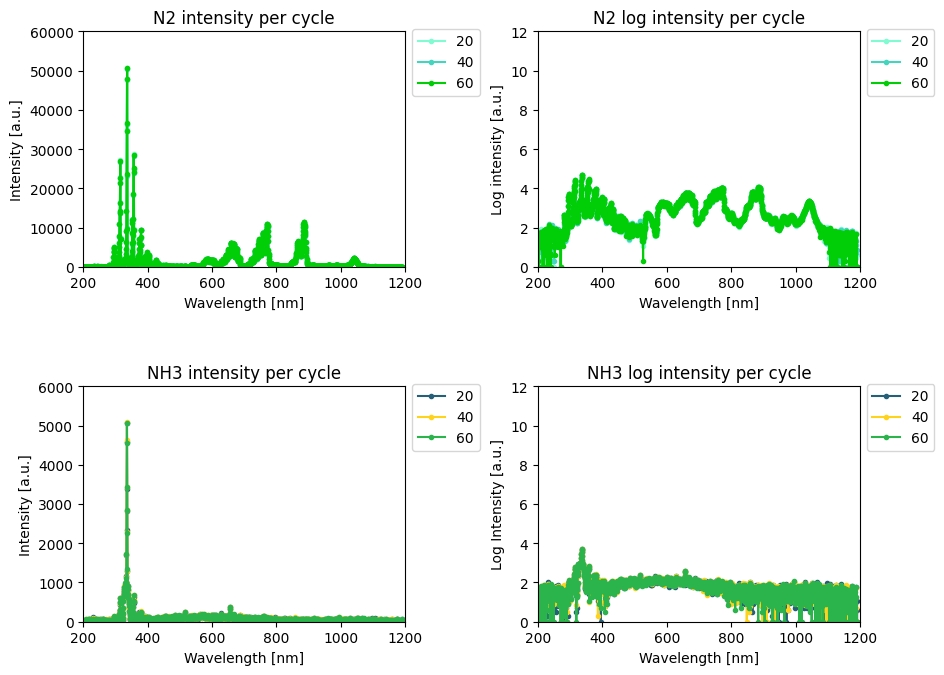

In [31]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
for i in range(3):
    axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
    axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity per cycle')
    axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
    axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity per cycle')
    axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity per cycle')
    axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
    axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
    axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity per cycle')
plt.show()

In [32]:
fig.savefig('file/process2/process2_dynamics.png')

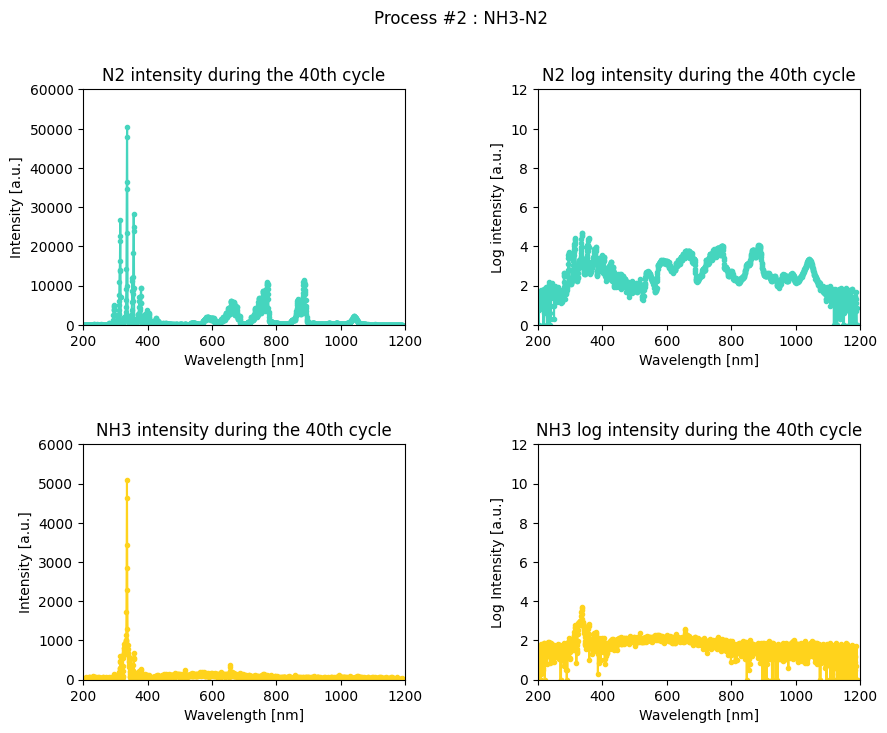

In [33]:
fig, axs = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(pad=6.5)
i = 1 # save the 40th cycle
axs[0,0].plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,0].set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
axs[0,1].plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[0,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
axs[1,0].plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,0].set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
axs[1,1].plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs[1,1].set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
fig.suptitle('Process #2 : NH3-N2')
plt.show()

No significant differences in a change of intensity with cycles observed.

In [34]:
fig.savefig('file/process2/process2_cycle40.png',bbox_inches=False)

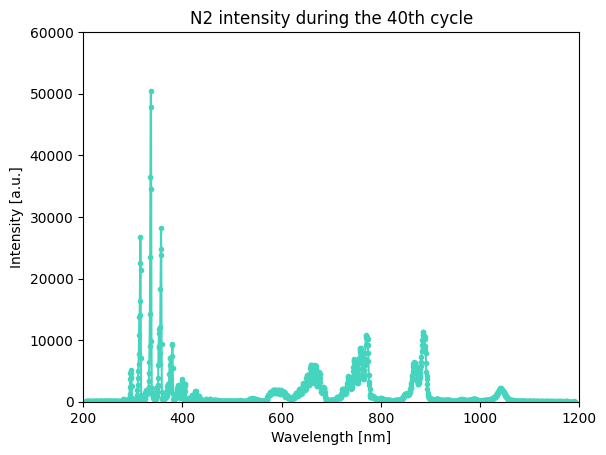

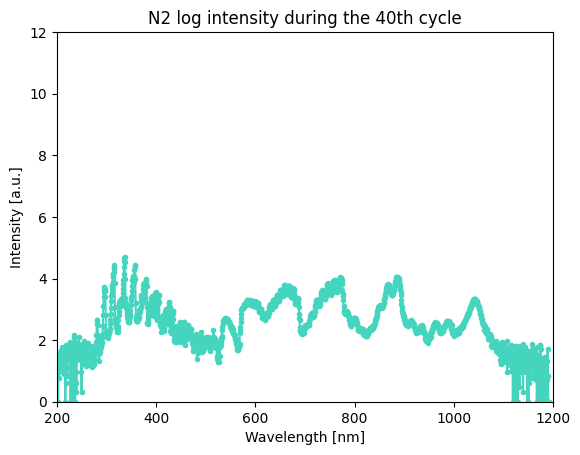

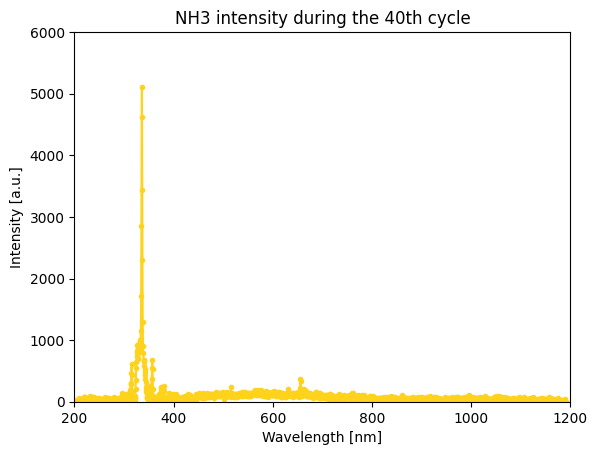

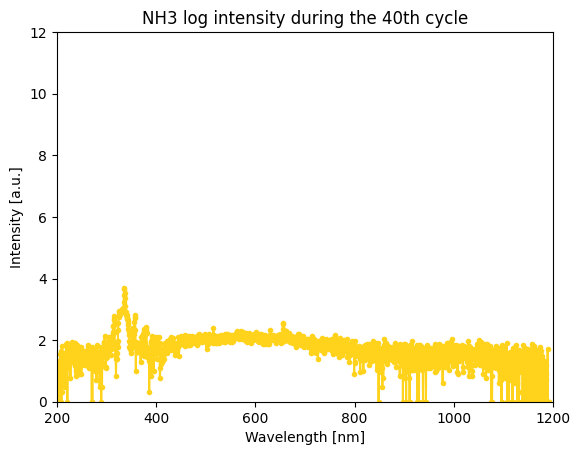

In [35]:
# to save each plot

i = 1 # save the 40th cycle
fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_absolute.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,60000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_N2_log.values.tolist()[i],'.-',color=colors[i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='N2 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_N2_log')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_absolute')

fig = plt.figure()
axs = plt.axes()
axs.plot(wavelength_scaled, c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# axs[0,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
plt.show()
fig.savefig('file/process2/process2_NH3_log')

# fig, axis = plt.plot(c_N2_log.values.tolist()[i],'.-',color=colors[i])
# # axs[0,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# axs.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log intensity [a.u.]', title='N2 log intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_absolute.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,0].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,6000), xlabel='Wavelength [nm]', ylabel='Intensity [a.u.]', title='NH3 intensity during the 40th cycle')
# plt.show()

# plt.plot(c_NH3_log.values.tolist()[i],'.-',color=colors[3+i])
# # axs[1,1].legend([20,40,60], bbox_to_anchor=(1, 1.04), loc='upper left')
# plt.set(xlim=(200,1200), ylim=(0,12), xlabel='Wavelength [nm]', ylabel='Log Intensity [a.u.]', title='NH3 log intensity during the 40th cycle')
# plt.show()

In [36]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

f

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                         

In [40]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_N2_absolute.columns.tolist()]
y = c_N2_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,60000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '0728cf72-2122-4b8e-978d-8c7886b7bc5c',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([ 0.,  0., 18., ...,  0.,  0.,  0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
               

In [428]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks.csv', index=False)

In [430]:
# make them interactive
x = [float(i) for i in c_N2_log.columns.tolist()]
y = c_N2_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; N2 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
scatter.line.color = '#a3a7e4'
scatter.marker.color = ['#a3a7e4'] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = ['#a3a7e4'] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': '3dd9d408-3726-4c24-8f33-7005bb3b3794',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 2.30258509, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; N2 log intensity during the 40th cyc

In [432]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_N2_log.csv', index=False)

In [38]:
# make them interactive
import plotly.graph_objects as go

x = [float(i) for i in c_NH3_absolute.columns.tolist()]
y = c_NH3_absolute.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,6000], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #2; NH3 intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'a9ef6ff8-b3e5-423c-9958-7f176a28bb5c',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0., 0., 3., ..., 0., 0., 0.])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #2; NH3 intensity during the 40th cycle'},
               'xaxis': {'gridcolor': 'lightgrey',
                    

In [435]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_absolute.csv', index=False)

In [39]:
# make them interactive
x = [float(i) for i in c_NH3_log.columns.tolist()]
y = c_NH3_log.iloc[1,:]
clicked = []

fig = go.FigureWidget([go.Scatter(x=x, y=y, mode='lines+markers')])
fig.update_layout(plot_bgcolor="white", xaxis_range=[200,1200], yaxis_range=[0,12], xaxis_title='Wavelegnth [nm]', yaxis_title='Intensity [a.u.]',
                 title='Process #1; NH3 log intensity during the 40th cycle')
fig.update_xaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
fig.update_yaxes(mirror=True, gridcolor='lightgrey', showgrid=True, linecolor='lightgray', showline=True)
scatter = fig.data[0]
cust_color = colors[4]
scatter.line.color = cust_color
scatter.marker.color = [cust_color] * len(x)
scatter.marker.size = [4] * len(x)
scatter.marker.line.color = [cust_color] * len(x)
scatter.marker.line.width = [1] * len(x)
fig.layout.hovermode = 'closest'


# create our callback functions
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = colors[5]
        s[i] = 10
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s
def store_value(trace, points, selector):
    global clicked
    clicked.append([points.__dict__['_xs'][0], points.__dict__['_ys'][0]])
    # df_peak.loc[len(df_peak)] = [points.__dict__['_xs'][0], points.__dict__['_ys'][1]]
def display_value(trace, points, selector):
    for point in points.point_inds:
        x_value = trace.x[point]
        y_value = trace.y[point]
        fig.add_annotation(x=x_value, y=y_value,
            text=f"<b>{x_value}</b>", ax=0, ay=-25, font=dict(size=10))

def wrapper(trace, points, selector):
    update_point(trace, points, selector)
    store_value(trace, points, selector)
    display_value(trace, points, selector)
    
scatter.on_click(wrapper)
# scatter.on_click(store_value)

fig

FigureWidget({
    'data': [{'line': {'color': '#a3a7e4'},
              'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ..., #a3a7e4,
                                   #a3a7e4, #a3a7e4],
                         'line': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, ...,
                                            #a3a7e4, #a3a7e4, #a3a7e4],
                                  'width': [1, 1, 1, ..., 1, 1, 1]},
                         'size': [4, 4, 4, ..., 4, 4, 4]},
              'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'a1d897bc-ff39-45ad-bafd-c40ceb6e3c7f',
              'x': [49.75, 50.25, 50.75, ..., 1190.63, 1191.24, 1191.83],
              'y': array([0.        , 0.        , 0.47712125, ..., 0.        , 0.        ,
                          0.        ])}],
    'layout': {'hovermode': 'closest',
               'plot_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Process #1; NH3 log intensity during the 40th cy

In [437]:
x = []
y = []
for elem in clicked:
    x.append(elem[0])
    y.append(elem[1])

df_clicked = pd.DataFrame({'wavelength[nm]':x, 'intensity [a.u.]':y})
df_clicked.to_csv('file/process1_peaks_NH3_log.csv', index=False)